In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA hh.csv")

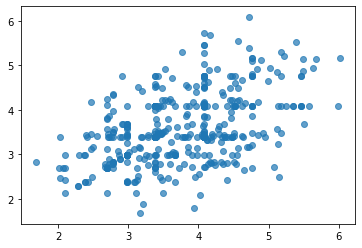

In [4]:
plt.scatter(df[(df.cost_2018_per_member_log != 0) & (df.cost_2019_per_member_log != 0)].cost_2018_per_member_log,
            df[(df.cost_2018_per_member_log != 0) & (df.cost_2019_per_member_log != 0)].cost_2019_per_member_log, 
            alpha = 0.7)

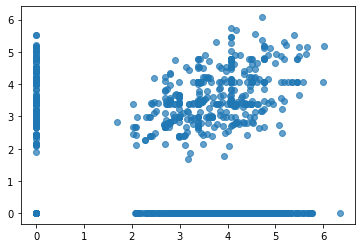

In [5]:
plt.scatter(df.cost_2018_per_member_log,
            df.cost_2019_per_member_log, 
            alpha = 0.7)

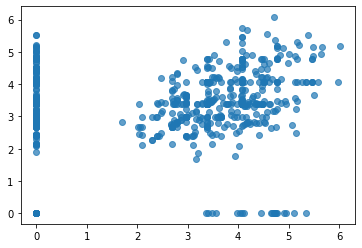

In [6]:
plt.scatter(df[df['call_2019_dummy'] == 1].cost_2018_per_member_log,
            df[df['call_2019_dummy'] == 1].cost_2019_per_member_log, 
            alpha = 0.7)

In [7]:
df.billing_grouped_other.value_counts()

0    3545
1      17
Name: billing_grouped_other, dtype: int64

In [5]:
cond = ~((df.billing_grouped_downgrade_member == 1) |
         (df.billing_grouped_new_member == 1) |
         (df.billing_grouped_renewal_to_daily == 1))
df.billing_grouped_other = df.billing_grouped_other.where(cond,1)

In [6]:
df.billing_grouped_other.value_counts()

0    3422
1     140
Name: billing_grouped_other, dtype: int64

In [7]:
df['dwelling_type_large_multi-family_w/o_apt_number'].value_counts()

0    3552
1      10
Name: dwelling_type_large_multi-family_w/o_apt_number, dtype: int64

In [8]:
df['dwelling_type_p.o._box'].value_counts()

0    3499
1      63
Name: dwelling_type_p.o._box, dtype: int64

In [9]:
df = df.assign(dwelling_type_other = ((df['dwelling_type_large_multi-family_w/o_apt_number'] == 1) | 
                                      (df['dwelling_type_p.o._box'] == 1)).astype('float64').astype('int'))

In [10]:
df = df.assign(fsv_rare_dummy = ((df.fsv_deposit_program_flag_y == 1) |
                                 (df.fsv_home_equity_flag_y == 1) |
                                 (df.fsv_mortgage_flag_y == 1)
                                ).astype('float64').astype('int'))

In [11]:
df = df.assign(primary_race_hispanic = ((df['primary_race_grouped_hispanic_-_hispanic_origin'] == 1) |
                                        (df['primary_race_grouped_hispanic_-_portuguese_origin'] == 1)
              ).astype('float64').astype('int'))

In [12]:
df = df.assign(primary_occupation_retired = ((df['primary_occupation_group_grouped_retired_-_inferred'] == 1) |
                                             (df['primary_occupation_group_grouped_retired_-_known'] == 1)
                                            ).astype('float64').astype('int'))

In [13]:
df = df.assign(new_member_dummy = (df['new_member'] == 1).astype('float64').astype('int'))

In [14]:
[i for i in df.columns]

['household_key',
 'individual_key',
 'fsv_any',
 'new_product_any',
 'aaa_before_club_dummy',
 'fin_missing',
 'children_num',
 'children_missing',
 'credit_ranges_num',
 'credit_ranges_missing',
 'income_mid',
 'income_missing',
 'member_primary',
 'renew_not_notice',
 'billing_grouped_cancellation',
 'billing_grouped_downgrade_member',
 'billing_grouped_new_member',
 'billing_grouped_other',
 'billing_grouped_renewal_to_daily',
 'billing_grouped_upgrade_member',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_other',
 'county_grouped_washington',
 'do_not_direct_mail_solicit_1.0',
 'dwelling_type_large_multi-family_w/o_apt_number',
 'dwelling_type_p.o._box',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'dwelling_type_nan',
 'education_completed_college',
 'education_graduated_school',
 'education_high_school',
 'education_unknown',
 'education_nan',
 'email_status_bounced',
 'email_status_held',
 'email_status_unsubscribe

LINEAR REGRESSION WILL BE RUN ON A SUBSAMPLE OF THOSE WHO HAD CALLS IN 2019. ADDITIONAL GROUPING OF VARIABLES IS NEEDED

In [15]:
df['call_2019_dummy'].value_counts()

0.0    2752
1.0     810
Name: call_2019_dummy, dtype: int64

In [16]:
df = df.assign(email_status_other_grouped = ((df.email_status_bounced == 1) | 
                                        (df.email_status_held == 1)).astype('float64').astype('int'))
df.email_status_other_grouped.value_counts()

0    3334
1     228
Name: email_status_other_grouped, dtype: int64

In [17]:
df = df.assign(primary_mosaic_global_household_other_grouped = ((df['primary_mosaic_global_household_low_income_elders'] == 1) | 
                                                           (df['primary_mosaic_global_household_metropolitan_strugglers'] == 1) |
                                                           (df['primary_mosaic_global_household_rural_inheritance'] == 1) |
                                                           (df['primary_mosaic_global_household_sophisticated_singles'] == 1)
                                                          ).astype('float64').astype('int'))
df.primary_mosaic_global_household_other_grouped.value_counts()

0    3298
1     264
Name: primary_mosaic_global_household_other_grouped, dtype: int64

In [18]:
df = df.assign(primary_occupation_group_grouped_blue_collar = ((df['primary_occupation_group_grouped_blue_collar_-_inferred'] == 1) |
                                                               (df['primary_occupation_group_grouped_blue_collar_-_known'] == 1)
                                                              ).astype('float64').astype('int'))
df.primary_occupation_group_grouped_blue_collar.value_counts()

0    3449
1     113
Name: primary_occupation_group_grouped_blue_collar, dtype: int64

In [19]:
df = df.assign(primary_occupation_group_grouped_management = ((df['primary_occupation_group_grouped_management_-_inferred'] == 1) |
                                                               (df['primary_occupation_group_grouped_management_-_known'] == 1)
                                                              ).astype('float64').astype('int'))
df.primary_occupation_group_grouped_management.value_counts()

0    3331
1     231
Name: primary_occupation_group_grouped_management, dtype: int64

In [20]:
df = df.assign(primary_occupation_group_grouped_office_administration = ((df['primary_occupation_group_grouped_office_administration_-_inferred'] == 1) |
                                                               (df['primary_occupation_group_grouped_office_administration_-_known'] == 1)
                                                              ).astype('float64').astype('int'))
df.primary_occupation_group_grouped_office_administration.value_counts()

0    3457
1     105
Name: primary_occupation_group_grouped_office_administration, dtype: int64

In [21]:
df = df.assign(primary_occupation_group_grouped_other = ((df['primary_occupation_group_grouped_other_-_inferred'] == 1) |
                                                               (df['primary_occupation_group_grouped_other_-_known'] == 1)
                                                              ).astype('float64').astype('int'))
df.primary_occupation_group_grouped_other.value_counts()

0    3458
1     104
Name: primary_occupation_group_grouped_other, dtype: int64

In [22]:
df = df.assign(primary_occupation_group_grouped_professional = ((df['primary_occupation_group_grouped_professional_-_inferred'] == 1) |
                                                               (df['primary_occupation_group_grouped_professional_-_known'] == 1)
                                                              ).astype('float64').astype('int'))
df.primary_occupation_group_grouped_professional.value_counts()

0    3184
1     378
Name: primary_occupation_group_grouped_professional, dtype: int64

In [23]:
df = df.assign(primary_occupation_group_grouped_sales = ((df['primary_occupation_group_grouped_sales_-_inferred'] == 1) |
                                                               (df['primary_occupation_group_grouped_sales_-_known'] == 1)
                                                              ).astype('float64').astype('int'))
df.primary_occupation_group_grouped_sales.value_counts()

0    3489
1      73
Name: primary_occupation_group_grouped_sales, dtype: int64

In [24]:
df = df.assign(primary_race_grouped_other_grouped = (
    (df['primary_race_grouped_asian'] == 1) |
    (df['primary_race_grouped_middle_eastern'] == 1) |
    (df['primary_race_grouped_other'] == 1) |
    (df['primary_race_grouped_unknown'] == 1)
    ).astype('float64').astype('int'))
df.primary_race_grouped_other_grouped.value_counts()

0    3327
1     235
Name: primary_race_grouped_other_grouped, dtype: int64

In [25]:
X = [
 'aaa_before_club_dummy',
 'fin_missing',
 'renew_not_notice',
 'billing_grouped_other',
 'billing_grouped_upgrade_member',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_washington',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'email_status_unsubscribed',
    'email_status_other_grouped',
 'email_status_nan',
 'member_phone_type_landline',
 'member_phone_type_voip',
 'member_phone_type_nan',
 'new_mover_flag_y',
 'plus_indicator_grouped_plus_membership',
 'plus_indicator_grouped_premier_membership',
 'mail_responder_no',
 'responded_to_catalog_yes',
 'responded_to_catalog_yes_multiple_responses',
 'primary_education_completed_college',
 'primary_education_high_school',
 'primary_education_unknown',
 'primary_gender_grouped_male',
 'primary_gender_grouped_nan',
 'primary_language_grouped_unknown',
 'primary_mosaic_global_household_bourgeois_prosperity',
 'primary_mosaic_global_household_career_and_family',
 'primary_mosaic_global_household_hard_working_blue_collar',
 'primary_mosaic_global_household_post_industrial_survivors',
 'primary_mosaic_global_household_routine_service_workers',
    'primary_mosaic_global_household_other_grouped',
 'primary_mosaic_global_household_nan',
    'primary_occupation_group_grouped_blue_collar',
    'primary_occupation_group_grouped_management',
    'primary_occupation_group_grouped_office_administration',
    'primary_occupation_group_grouped_other',
    'primary_occupation_group_grouped_professional',
    'primary_occupation_group_grouped_sales',
 'primary_occupation_group_grouped_technical',
 'primary_race_hispanic',
    'primary_race_grouped_other_grouped',
 'children_num_std',
 'primary_credit_ranges_num_std',
 'primary_income_mid_std',
 'member_out_std',
 'age_2018_primary_std',
 'join_club_year_std',
      'active_2018_std'
]

In [26]:
X01 = list(X)
X02 = list(X)
X03 = list(X)
X04 = list(X)
X01.append('cost_2018_std')
X02.append('cost_2018_per_member_std')
X03.append('cost_2018_log_std')
X04.append('cost_2018_per_member_log_std')

SPLIT INTO TRAIN AND TEST SETS

In [27]:
df_train, df_test = train_test_split(df, random_state = 15)

LINEAR REGRESSION

In [28]:
X_train_01 = df_train[df_train['call_2019_dummy'] == 1][X01]
X_test_01 = df_test[df_test['call_2019_dummy'] == 1][X01]
Y_train_01 = df_train[df_train['call_2019_dummy'] == 1].cost_2019
Y_test_01 = df_test[df_test['call_2019_dummy'] == 1].cost_2019
X_train_02 = df_train[df_train['call_2019_dummy'] == 1][X02]
X_test_02 = df_test[df_test['call_2019_dummy'] == 1][X02]
Y_train_02 = df_train[df_train['call_2019_dummy'] == 1].cost_2019_per_member
Y_test_02 = df_test[df_test['call_2019_dummy'] == 1].cost_2019_per_member
X_train_03 = df_train[df_train['call_2019_dummy'] == 1][X03]
X_test_03 = df_test[df_test['call_2019_dummy'] == 1][X03]
Y_train_03 = df_train[df_train['call_2019_dummy'] == 1].cost_2019_log
Y_test_03 = df_test[df_test['call_2019_dummy'] == 1].cost_2019_log
X_train_04 = df_train[df_train['call_2019_dummy'] == 1][X04]
X_test_04 = df_test[df_test['call_2019_dummy'] == 1][X04]
Y_train_04 = df_train[df_train['call_2019_dummy'] == 1].cost_2019_per_member_log
Y_test_04 = df_test[df_test['call_2019_dummy'] == 1].cost_2019_per_member_log

In [29]:
lr = LinearRegression()

In [30]:
df.shape

(3562, 250)

In [31]:
print(Y_train_04.shape)
print(Y_test_04.shape)

(601,)
(209,)


In [32]:
lr.fit(X_train_01, Y_train_01)
print(lr.score(X_train_01, Y_train_01))
print(lr.score(X_test_01, Y_test_01))
y_pred_01 = lr.predict(X_test_01)
print(np.sqrt(metrics.mean_squared_error(y_pred_01, df_test[df_test['call_2019_dummy'] == 1]['cost_2019'])))
y_pred_full_01 = lr.predict(df[X01])
y_pred_df_01 = pd.DataFrame(y_pred_full_01, columns = ['costs_cond_01'])
df = pd.concat([df, y_pred_df_01], axis = 1)
coefs = pd.DataFrame(lr.coef_, columns = ['Lin 01'])
coef_labels = pd.DataFrame(X_train_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Lin 01.csv")

0.17029809205285473
0.0344676443287687
48.116129778582824


In [33]:
lr.fit(X_train_02, Y_train_02)
print(lr.score(X_train_02, Y_train_02))
print(lr.score(X_test_02, Y_test_02))
y_pred_02 = lr.predict(X_test_02)
y_pred_02_transformed = y_pred_02 * df_test[df_test['call_2019_dummy'] == 1]['active_2019']
print(np.sqrt(metrics.mean_squared_error(y_pred_02_transformed, 
                                         df_test[df_test['call_2019_dummy'] == 1]['cost_2019'])))
y_pred_full_02 = lr.predict(df[X02])
y_pred_full_02_transformed = y_pred_full_02 * df['active_2019']
y_pred_df_02 = y_pred_full_02_transformed.to_frame(name = "costs_cond_02")
df = pd.concat([df, y_pred_df_02], axis = 1)
coefs = pd.DataFrame(lr.coef_, columns = ['Lin 02'])
coef_labels = pd.DataFrame(X_train_02.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Lin 02.csv")

0.2686783448933222
0.1663711038117497
66.15606596472166


In [37]:
lr.fit(X_train_03, Y_train_03)
print(lr.score(X_train_03, Y_train_03))
print(lr.score(X_test_03, Y_test_03))
y_pred_03 = lr.predict(X_test_03)
y_pred_03_transformed = np.exp(y_pred_03)
print(np.sqrt(metrics.mean_squared_error(y_pred_03_transformed, 
                                         df_test[df_test['call_2019_dummy'] == 1]['cost_2019'])))
y_pred_full_03 = lr.predict(df[X03])
y_pred_full_03_transformed = np.exp(y_pred_full_03)
y_pred_df_03 = pd.DataFrame(y_pred_full_03_transformed, columns = ["costs_cond_03"])
df = pd.concat([df, y_pred_df_03], axis = 1)
coefs = pd.DataFrame(lr.coef_, columns = ['Lin 03'])
coef_labels = pd.DataFrame(X_train_03.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Lin 03.csv")

0.18799898327469597
0.0338582964218096
48.6685563428313


In [38]:
lr.fit(X_train_04, Y_train_04)
print(lr.score(X_train_04, Y_train_04))
print(lr.score(X_test_04, Y_test_04))
y_pred_04 = lr.predict(X_test_04)
y_pred_04_transformed = np.exp(y_pred_04) * df_test[df_test['call_2019_dummy'] == 1]['active_2019']
print(np.sqrt(metrics.mean_squared_error(y_pred_04_transformed, 
                                         df_test[df_test['call_2019_dummy'] == 1]['cost_2019'])))
y_pred_full_04 = lr.predict(df[X04])
y_pred_full_04_transformed = np.exp(y_pred_full_04) * df['active_2019']
y_pred_df_04 = y_pred_full_04_transformed.to_frame(name = "costs_cond_04")
df = pd.concat([df, y_pred_df_04], axis = 1)
coefs = pd.DataFrame(lr.coef_, columns = ['Lin 04'])
coef_labels = pd.DataFrame(X_train_04.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Lin 04.csv")

0.3067072374329226
0.25023712384342234
61.08681457297446


In [39]:
pd.Series(y_pred_full_01).describe()

count    3562.000000
mean       73.011867
std        21.622477
min       -17.894341
25%        58.724969
50%        72.582333
75%        87.173237
max       184.293424
dtype: float64

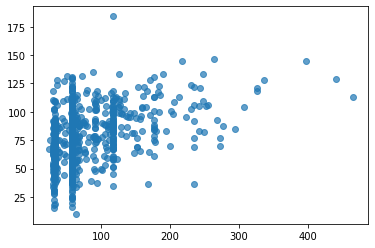

In [40]:
plt.scatter(df[df['call_2019_dummy'] == 1].cost_2019,
            df[df['call_2019_dummy'] == 1].costs_cond_01, 
            alpha = 0.7)

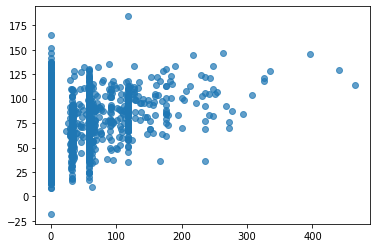

In [41]:
plt.scatter(df.cost_2019,
            df.costs_cond_01, 
            alpha = 0.7)

In [42]:
pd.Series(y_pred_full_02).describe()

count    3562.000000
mean       50.863516
std        20.762426
min       -31.555996
25%        38.121184
50%        50.388588
75%        63.673285
max       149.258510
dtype: float64

In [43]:
pd.Series(y_pred_full_02_transformed).describe()

count    3562.000000
mean       71.357955
std        35.982308
min      -189.335974
25%        52.253928
50%        68.773114
75%        88.943254
max       454.611228
Name: active_2019, dtype: float64

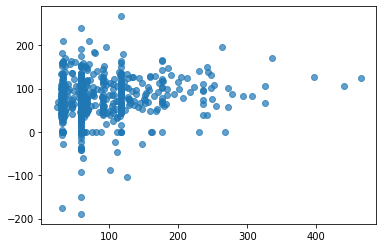

In [44]:
plt.scatter(df[df['call_2019_dummy'] == 1].cost_2019,
            df[df['call_2019_dummy'] == 1].costs_cond_02, 
            alpha = 0.7)

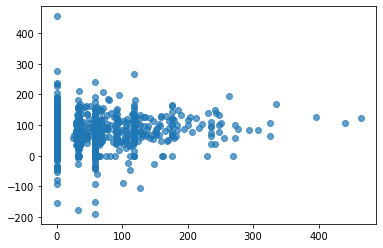

In [45]:
plt.scatter(df.cost_2019,
            df.costs_cond_02, 
            alpha = 0.7)

In [46]:
pd.Series(y_pred_full_03).describe()

count    3562.000000
mean        4.134575
std         0.228023
min         3.009468
25%         3.987554
50%         4.139834
75%         4.290872
max         4.852557
dtype: float64

In [47]:
pd.Series(y_pred_full_03_transformed).describe()

count    3562.000000
mean       64.089089
std        14.561733
min        20.276615
25%        53.922815
50%        62.792366
75%        73.030109
max       128.067454
dtype: float64

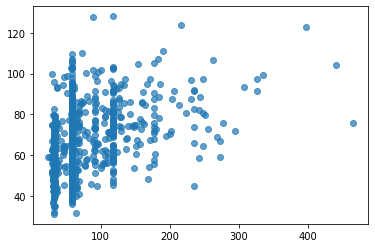

In [48]:
plt.scatter(df[df['call_2019_dummy'] == 1].cost_2019,
            df[df['call_2019_dummy'] == 1].costs_cond_03, 
            alpha = 0.7)

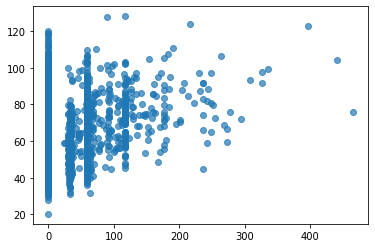

In [49]:
plt.scatter(df.cost_2019,
            df.costs_cond_03, 
            alpha = 0.7)

In [50]:
pd.Series(y_pred_full_04).describe()

count    3562.000000
mean        3.576351
std         0.503924
min        -1.175967
25%         3.365539
50%         3.635542
75%         3.884248
max         5.109788
dtype: float64

In [51]:
pd.Series(y_pred_full_04_transformed).describe()

count    3562.000000
mean       59.499203
std        30.314043
min         0.000000
25%        41.974794
50%        55.879657
75%        73.097706
max       576.013889
Name: active_2019, dtype: float64

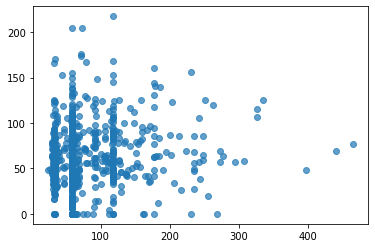

In [52]:
plt.scatter(df[df['call_2019_dummy'] == 1].cost_2019,
            df[df['call_2019_dummy'] == 1].costs_cond_04, 
            alpha = 0.7)

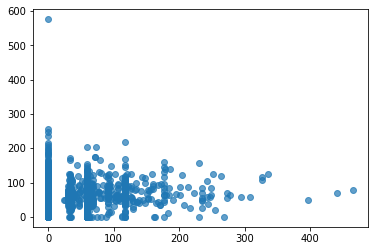

In [53]:
plt.scatter(df.cost_2019,
            df.costs_cond_04, 
            alpha = 0.7)

4th configuration (per member in logs) is kept for the following reasons:
- Adjustment quality
- No negative costs predictions due to logs

LOGIT MODELS

In [54]:
X_rs_01 = list(X)
X_rs_02 = list(X)
X_rs_03 = list(X)
X_rs_04 = list(X)
X_rs_01.append('cost_2018_std')
X_rs_02.append('calls_2018_std')
X_rs_03.extend(['cost_2018_std',
                'fsv_cmsi_flag_y',
                'fsv_credit_card_flag_y',
                'fsv_id_theft_flag_y',
                'fsv_rare_dummy',
                'ins_client_flag_y',
                'trv_globalware_flag_y'
               ])
X_rs_04.extend(['calls_2018_std',
                'fsv_cmsi_flag_y',
                'fsv_credit_card_flag_y',
                'fsv_id_theft_flag_y',
                'fsv_rare_dummy',
                'ins_client_flag_y',
                'trv_globalware_flag_y'
               ])

In [55]:
X_train_rs_01 = df_train[X_rs_01]
X_test_rs_01 = df_test[X_rs_01]
X_train_rs_02 = df_train[X_rs_02]
X_test_rs_02 = df_test[X_rs_02]
X_train_rs_03 = df_train[X_rs_03]
X_test_rs_03 = df_test[X_rs_03]
X_train_rs_04 = df_train[X_rs_04]
X_test_rs_04 = df_test[X_rs_04]

In [56]:
Y_rs_train = df_train['call_2019_dummy']
Y_rs_test = df_test['call_2019_dummy']

In [57]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [58]:
lgr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

In [59]:
lgr.fit(X_train_rs_01, Y_rs_train)
rs_pred_01 = lgr.predict(X_test_rs_01)
rs_pr_01 = lgr.predict_proba(X_test_rs_01)
print(f1_score(Y_rs_test, rs_pred_01))
print(log_loss(Y_rs_test, rs_pr_01))
rs_pr_full_01 = lgr.predict_proba(df[X_rs_01])
cfm = confusion_matrix(Y_rs_test, rs_pred_01)
print(cfm)
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log rs 01'])
coef_labels = pd.DataFrame(X_train_rs_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log rs 01.csv")
rs_pr_full_01 = lgr.predict_proba(df[X_rs_01])[:,1]
rs_pr_df_01 = pd.DataFrame(rs_pr_full_01, columns = ['rs_pred_01'])
df = pd.concat([df, rs_pr_df_01], axis = 1)

0.20363636363636364
0.5252263026884597
[[644  38]
 [181  28]]


In [60]:
lgr.fit(X_train_rs_02, Y_rs_train)
rs_pred_02 = lgr.predict(X_test_rs_02)
rs_pr_02 = lgr.predict_proba(X_test_rs_02)
print(f1_score(Y_rs_test, rs_pred_02))
print(log_loss(Y_rs_test, rs_pr_02))
rs_pr_full_02 = lgr.predict_proba(df[X_rs_02])
cfm = confusion_matrix(Y_rs_test, rs_pred_02)
print(cfm)
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log rs 02'])
coef_labels = pd.DataFrame(X_train_rs_02.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log rs 02.csv")
rs_pr_full_02 = lgr.predict_proba(df[X_rs_02])[:,1]
rs_pr_df_02 = pd.DataFrame(rs_pr_full_02, columns = ['rs_pred_02'])
df = pd.concat([df, rs_pr_df_02], axis = 1)

0.21660649819494585
0.5232271602127363
[[644  38]
 [179  30]]


In [61]:
lgr.fit(X_train_rs_03, Y_rs_train)
rs_pred_03 = lgr.predict(X_test_rs_03)
rs_pr_03 = lgr.predict_proba(X_test_rs_03)
print(f1_score(Y_rs_test, rs_pred_03))
print(log_loss(Y_rs_test, rs_pr_03))
rs_pr_full_03 = lgr.predict_proba(df[X_rs_03])
cfm = confusion_matrix(Y_rs_test, rs_pred_03)
print(cfm)
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log rs 03'])
coef_labels = pd.DataFrame(X_train_rs_03.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log rs 03.csv")
rs_pr_full_03 = lgr.predict_proba(df[X_rs_03])[:,1]
rs_pr_df_03 = pd.DataFrame(rs_pr_full_03, columns = ['rs_pred_03'])
df = pd.concat([df, rs_pr_df_03], axis = 1)

0.20363636363636364
0.5257554041266198
[[644  38]
 [181  28]]


In [62]:
lgr.fit(X_train_rs_04, Y_rs_train)
rs_pred_04 = lgr.predict(X_test_rs_04)
rs_pr_04 = lgr.predict_proba(X_test_rs_04)
print(f1_score(Y_rs_test, rs_pred_04))
print(log_loss(Y_rs_test, rs_pr_04))
rs_pr_full_04 = lgr.predict_proba(df[X_rs_04])
cfm = confusion_matrix(Y_rs_test, rs_pred_04)
print(cfm)
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log rs 04'])
coef_labels = pd.DataFrame(X_train_rs_04.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log rs 04.csv")
rs_pr_full_04 = lgr.predict_proba(df[X_rs_04])[:,1]
rs_pr_df_04 = pd.DataFrame(rs_pr_full_04, columns = ['rs_pred_04'])
df = pd.concat([df, rs_pr_df_04], axis = 1)

0.21818181818181817
0.5235860237489289
[[646  36]
 [179  30]]


Conclusion: No big differences in terms of performance between models. 1st configuration is kept

BUILDING VARIABLE FOR EXPECTED COSTS

In [63]:
df['rs_pred_01'].describe()

count    3562.000000
mean        0.224181
std         0.156929
min         0.023946
25%         0.111825
50%         0.179605
75%         0.289016
max         0.987847
Name: rs_pred_01, dtype: float64

In [64]:
df = df.assign(expected_costs = df['costs_cond_04'] * df['rs_pred_01'])

In [65]:
df['expected_costs'].describe()

count    3562.000000
mean       14.470650
std        15.999031
min         0.000000
25%         4.906164
50%         9.433069
75%        18.079303
max       210.373457
Name: expected_costs, dtype: float64

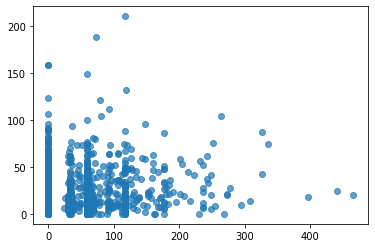

In [66]:
plt.scatter(df.cost_2019,
            df['expected_costs'], 
            alpha = 0.7)

LOGIT MODELS FOR NEW PRODUCTS

In [67]:
X_new_01 = list(X_rs_01)
X_new_01.extend(['motorcycle_indicator_y', 'motorcycle_indicator_nan',])
X_new_01

['aaa_before_club_dummy',
 'fin_missing',
 'renew_not_notice',
 'billing_grouped_other',
 'billing_grouped_upgrade_member',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_washington',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'email_status_unsubscribed',
 'email_status_other_grouped',
 'email_status_nan',
 'member_phone_type_landline',
 'member_phone_type_voip',
 'member_phone_type_nan',
 'new_mover_flag_y',
 'plus_indicator_grouped_plus_membership',
 'plus_indicator_grouped_premier_membership',
 'mail_responder_no',
 'responded_to_catalog_yes',
 'responded_to_catalog_yes_multiple_responses',
 'primary_education_completed_college',
 'primary_education_high_school',
 'primary_education_unknown',
 'primary_gender_grouped_male',
 'primary_gender_grouped_nan',
 'primary_language_grouped_unknown',
 'primary_mosaic_global_household_bourgeois_prosperity',
 'primary_mosaic_global_household_career_and_family',
 'primary_mosaic_gl

COLINEARITY CHECK

In [68]:
corr = np.corrcoef(df[X_rs_01], rowvar = False)
w, v = np.linalg.eig(corr)
w = pd.Series(w)
[i for i in w]

[2.997022257790972,
 2.541135383731023,
 2.0401171458921015,
 0.22810737435462292,
 1.5929686632287712,
 1.6017470776453215,
 0.27536835322750686,
 0.33335149995989233,
 0.3512021251532178,
 1.4586960016328423,
 0.3789333789783045,
 0.4130612058041307,
 0.43914070075168893,
 0.4599235606303185,
 1.3894945930736284,
 0.4999496208979504,
 0.5585679254469452,
 0.5493209449690648,
 1.3375949924186468,
 0.6397773369481129,
 1.3051231616835663,
 0.6779602543433602,
 0.6979588395364466,
 1.2565730882614534,
 0.7420065901640427,
 1.2337881297536473,
 1.214278156109659,
 0.7816265688016452,
 1.1891382133711195,
 1.1776579697466114,
 0.8065877870263577,
 0.8187579909139874,
 1.1523626470193158,
 0.8445157771857579,
 0.8702783924864754,
 0.880398585608757,
 0.897130761709021,
 0.9165600210570495,
 1.1114143217590584,
 1.1035702230613897,
 1.0971040386644533,
 0.9368932797090377,
 1.0822223985291406,
 1.0696539161740726,
 1.0570587597008834,
 1.0488439805344352,
 1.0295570059255754,
 1.01781713206

All fine

In [69]:
X_train_new_01 = df_train[X_new_01]
X_test_new_01 = df_test[X_new_01]

Logit for fsv_any

In [70]:
Y_fsv_any_train = df_train['fsv_any']
Y_fsv_any_test = df_test['fsv_any']

In [71]:
lgr.fit(X_train_new_01, Y_fsv_any_train)
fsv_any_pred_01 = lgr.predict(X_test_new_01)
fsv_any_pr_01 = lgr.predict_proba(X_test_new_01)
print(f1_score(Y_fsv_any_test, fsv_any_pred_01))
print(log_loss(Y_fsv_any_test, fsv_any_pr_01))
fsv_any_pr_full_01 = lgr.predict_proba(df[X_new_01])
cfm = confusion_matrix(Y_fsv_any_test, fsv_any_pred_01)
print(cfm)
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log FSV any 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log FSV any 01.csv")
fsv_any_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
fsv_any_pr_df_01 = pd.DataFrame(fsv_any_pr_full_01, columns = ['fsv_any_pred_01'])
df = pd.concat([df, fsv_any_pr_df_01], axis = 1)

0.17037037037037037
0.5418584994749192
[[644  25]
 [199  23]]


Logit for new products together

In [72]:
Y_new_any_train = df_train['new_product_any']
Y_new_any_test = df_test['new_product_any']

In [73]:
lgr.fit(X_train_new_01, Y_new_any_train)
new_any_pred_01 = lgr.predict(X_test_new_01)
new_any_pr_01 = lgr.predict_proba(X_test_new_01)
print(f1_score(Y_new_any_test, new_any_pred_01))
print(log_loss(Y_new_any_test, new_any_pr_01))
new_any_pr_full_01 = lgr.predict_proba(df[X_new_01])
cfm = confusion_matrix(Y_new_any_test, new_any_pred_01)
print(cfm)
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log new any 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log new any 01.csv")
new_any_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
new_any_pr_df_01 = pd.DataFrame(new_any_pr_full_01, columns = ['new_any_pred_01'])
df = pd.concat([df, new_any_pr_df_01], axis = 1)

0.6221765913757701
0.6732944606272663
[[220 209]
 [159 303]]


Logit for FSV CMSI

In [74]:
Y_cmsi_train = df_train['fsv_cmsi_flag_y']
Y_cmsi_test = df_test['fsv_cmsi_flag_y']

In [75]:
lgr.fit(X_train_new_01, Y_cmsi_train)
cmsi_pred_01 = lgr.predict(X_test_new_01)
cmsi_pr_01 = lgr.predict_proba(X_test_new_01)
print(f1_score(Y_cmsi_test, cmsi_pred_01))
print(log_loss(Y_cmsi_test, cmsi_pr_01))
cmsi_pr_full_01 = lgr.predict_proba(df[X_new_01])
cfm = confusion_matrix(Y_cmsi_test, cmsi_pred_01)
print(cfm)
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log CMSI 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log CMSI 01.csv")
cmsi_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
cmsi_pr_df_01 = pd.DataFrame(cmsi_pr_full_01, columns = ['cmsi_pred_01'])
df = pd.concat([df, cmsi_pr_df_01], axis = 1)

0.0
0.2576440822229906
[[817   0]
 [ 74   0]]


c:\users\jklim\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Logit for credit card

In [76]:
Y_credit_train = df_train['fsv_credit_card_flag_y']
Y_credit_test = df_test['fsv_credit_card_flag_y']

In [77]:
lgr.fit(X_train_new_01, Y_credit_train)
credit_pred_01 = lgr.predict(X_test_new_01)
credit_pr_01 = lgr.predict_proba(X_test_new_01)
print(f1_score(Y_credit_test, credit_pred_01))
print(log_loss(Y_credit_test, credit_pr_01))
credit_pr_full_01 = lgr.predict_proba(df[X_new_01])
cfm = confusion_matrix(Y_credit_test, credit_pred_01)
print(cfm)
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log Credit 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log Credit 01.csv")
credit_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
credit_pr_df_01 = pd.DataFrame(credit_pr_full_01, columns = ['credit_pred_01'])
df = pd.concat([df, credit_pr_df_01], axis = 1)

0.07407407407407407
0.39483459698951634
[[761   2]
 [123   5]]


ID theft

In [78]:
Y_id_train = df_train['fsv_id_theft_flag_y']
Y_id_test = df_test['fsv_id_theft_flag_y']

In [79]:
lgr.fit(X_train_new_01, Y_id_train)
id_pred_01 = lgr.predict(X_test_new_01)
id_pr_01 = lgr.predict_proba(X_test_new_01)
id_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
id_pr_df_01 = pd.DataFrame(id_pr_full_01, columns = ['id_pred_01'])
df = pd.concat([df, id_pr_df_01], axis = 1)
cfm = confusion_matrix(Y_id_test, id_pred_01)
print(cfm)
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log ID 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log ID 01.csv")
print(f1_score(Y_id_test, id_pred_01))
print(log_loss(Y_id_test, id_pr_01))
id_pr_full_01 = lgr.predict_proba(df[X_new_01])

[[844   0]
 [ 47   0]]
0.0
0.20504882503741562


c:\users\jklim\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Logit for other FSV

In [80]:
Y_fsv_rare_train = df_train['fsv_rare_dummy']
Y_fsv_rare_test = df_test['fsv_rare_dummy']

In [81]:
lgr.fit(X_train_new_01, Y_fsv_rare_train)
fsv_rare_pred_01 = lgr.predict(X_test_new_01)
fsv_rare_pr_01 = lgr.predict_proba(X_test_new_01)
fsv_rare_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
fsv_rare_pr_df_01 = pd.DataFrame(fsv_rare_pr_full_01, columns = ['fsv_rare_pred_01'])
df = pd.concat([df, fsv_rare_pr_df_01], axis = 1)
cfm = confusion_matrix(Y_fsv_rare_test, fsv_rare_pred_01)
print(cfm)
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log FSV rare 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef FSV rare 01.csv")
print(f1_score(Y_fsv_rare_test, fsv_rare_pred_01))
print(log_loss(Y_fsv_rare_test, fsv_rare_pr_01))
fsv_rare_pr_full_01 = lgr.predict_proba(df[X_new_01])

[[878   0]
 [ 13   0]]
0.0
0.0859212960643256


c:\users\jklim\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Logit Insurance

In [82]:
Y_ins_train = df_train['ins_client_flag_y']
Y_ins_test = df_test['ins_client_flag_y']

In [83]:
lgr.fit(X_train_new_01, Y_ins_train)
ins_pred_01 = lgr.predict(X_test_new_01)
ins_pr_01 = lgr.predict_proba(X_test_new_01)
ins_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
ins_pr_df_01 = pd.DataFrame(ins_pr_full_01, columns = ['ins_pred_01'])
df = pd.concat([df, ins_pr_df_01], axis = 1)
cfm = confusion_matrix(Y_ins_test, ins_pred_01)
print(cfm)
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log INS 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef INS 01.csv")
print(f1_score(Y_ins_test, ins_pred_01))
print(log_loss(Y_ins_test, ins_pr_01))
ins_pr_full_01 = lgr.predict_proba(df[X_new_01])

[[616  16]
 [245  14]]
0.09688581314878894
0.5874687293379633


Logit for travel

In [84]:
Y_trv_train = df_train['trv_globalware_flag_y']
Y_trv_test = df_test['trv_globalware_flag_y']

In [85]:
lgr.fit(X_train_new_01, Y_trv_train)
trv_pred_01 = lgr.predict(X_test_new_01)
trv_pr_01 = lgr.predict_proba(X_test_new_01)
trv_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
trv_pr_df_01 = pd.DataFrame(trv_pr_full_01, columns = ['trv_pred_01'])
df = pd.concat([df, trv_pr_df_01], axis = 1)
cfm = confusion_matrix(Y_trv_test, trv_pred_01)
print(cfm)
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log TRV 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef TRV 01.csv")
print(f1_score(Y_trv_test, trv_pred_01))
print(log_loss(Y_trv_test, trv_pr_01))
trv_pr_full_01 = lgr.predict_proba(df[X_new_01])

[[728   6]
 [155   2]]
0.024242424242424242
0.46344890623632834


In [86]:
export_csv = df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA for cluster.csv")

In [34]:
export_csv = df_train.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA train.csv")